<a href="https://colab.research.google.com/github/SimeonHristov99/ML_21-22/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interview Success Prediction Challenge
- Goal: Predict whether a candidate will pass an interview.
- Data: https://www.kaggle.com/datasets/vingkan/strategeion-resume-skills
- Type: Binary Classififaction
> **Note**: This is a synthetic dataset.

## Imports and Constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import log_loss

from sklearn.tree import plot_tree
from sklearn.metrics import f1_score

In [3]:
FIG_SIZE = (12, 10)
DATA_PATH = 'https://raw.githubusercontent.com/SimeonHristov99/ML_21-22/main/Week_10%20-%20Unsupervised%20Learning.%20Dimensionality%20Reduction/data/resumes_development.csv'

plt.rc('figure', figsize=FIG_SIZE)
pd.set_option('max_columns', None)

## Get the data

In [4]:
df = pd.read_csv(DATA_PATH)
df

,Unnamed: 0,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,Baseball,Basketball,Branding,Budgeting,Business Analysis,Business Intelligence,Business Planning,Business Process,Business Process Improvement,Business Services,Business Strategy,Change Management,Coaching,Communication,Company Research,Construction,Contract Negotiation,Contractual Agreements,Customer Relationship Management,Customer Satisfaction,Customer Service,Data Analysis,Databases,Decision Making,Department of Defense,Design,Development Tools,Digital Marketing,Digital Media,Diving,Drawing,Ecommerce,Editing,Electronics,Email,Employee Benefits Design,Energy,Enterprise Software,Entrepreneurship,Event Planning,Facilitation,Facility Management,Finance,Financial Analysis,Financial Reporting,Financial Risk,Food and Beverage,Football,Forecasting,Fundraising,Gas,General Ledger,Golf,Government Agencies,Grant Writing,Graphic Design,Graphics,Grocery,Gymnastics,HTML,HTML5,Healthcare,Healthcare Management,Heavy Equipment,Helping Clients Succeed,Higher Education,History,Hospitality Industry,Hospitals,Information Systems,Information Technology,Insurance,Integrated Marketing,Integration,Internal Audit,Interpersonal Skills,Interviewing,Investments,Invoicing,JQuery,Java,Javascript,Job Description Development,Job Scanning,Joint Ventures,Journalism,Journals,K12 Education,Kanban,Key Account Development,Key Performance Indicators,Kindergarten,Knowledge Base,Knowledge Management,Knowledge Sharing,Laboratory Skills,Leadership,Leadership Development,Lean Manufacturing,Legal Issues,Legal Writing,Linux,Litigation,Local Marketing,Logistics Management,Marine Corps,Mechanical Engineering,Medical Compliance,Military Aviation,Military Weapons,Negotiation,Network Administration,Network Attached Storage,Network Communications,Network Systems,New Business Opportunities,New Hires,Newsletters,Nonprofit Organizations,Nutrition,Office Administration,Online Advertising,Operating Systems,Operations Management,Oracle Database,Order Fulfillment,Organizational Development,Organizational Structure,Outsourcing,Partnerships,Performance Tuning,Presentations,Pricing Strategy,Problem Solving,Program Management,Project Planning,Public Policy,Public Relations,Public Speaking,Qualifying Prospects,Qualitative Research,Quality Auditing,Quality Improvement,Quality System,Quantitative Research,Query Writing,Queues,QuickBooks,Quotations,Range,Real Estate,Records,Recruiting,Regulations,Requirements Analysis,Research,Residential Homes,Retail,Reviews,SQL,Sales Management,Schedules,Soccer,Social Media,Software,Software Documentation,Staff Development,Strategic Planning,Strategy,Supervisory Skills,Swimming,Teaching,Team Building,Team Leadership,Team Management,Teamwork,Telecommunications,Testing,Time Management,Training,Troubleshooting,Underwriting,Unified Modeling Language,University Teaching,Unix,User Acceptance Testing,User Experience,User Interface Design,Validation,Vendor Management,Vendors,Video,Video Editing,Video Production,Visual Merchandising,Volleyball,Volunteer Management,Volunteering,Water Resource Management,Web Applications,Web Design,Web Development,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Exploratory Data Analysis

Since this is a synthetic dataset, we should not draw conclusions when exploring it.

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 224 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    Unnamed: 0                        619 non-null    int64  
 1    Interview                         619 non-null    float64
 2    Adobe Illustrator                 619 non-null    float64
 3    Adobe Photoshop                   619 non-null    float64
 4    Agile Methodologies               619 non-null    float64
 5    Analytical Skills                 619 non-null    float64
 6    Art                               619 non-null    float64
 7    Art Direction                     619 non-null    float64
 8    Auditing                          619 non-null    float64
 9    AutoCAD                           619 non-null    float64
 10   Automation                        619 non-null    float64
 11   Automotive                        619 non-null    float6

In [6]:
df.describe()

,Unnamed: 0,Interview,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,Baseball,Basketball,Branding,Budgeting,Business Analysis,Business Intelligence,Business Planning,Business Process,Business Process Improvement,Business Services,Business Strategy,Change Management,Coaching,Communication,Company Research,Construction,Contract Negotiation,Contractual Agreements,Customer Relationship Management,Customer Satisfaction,Customer Service,Data Analysis,Databases,Decision Making,Department of Defense,Design,Development Tools,Digital Marketing,Digital Media,Diving,Drawing,Ecommerce,Editing,Electronics,Email,Employee Benefits Design,Energy,Enterprise Software,Entrepreneurship,Event Planning,Facilitation,Facility Management,Finance,Financial Analysis,Financial Reporting,Financial Risk,Food and Beverage,Football,Forecasting,Fundraising,Gas,General Ledger,Golf,Government Agencies,Grant Writing,Graphic Design,Graphics,Grocery,Gymnastics,HTML,HTML5,Healthcare,Healthcare Management,Heavy Equipment,Helping Clients Succeed,Higher Education,History,Hospitality Industry,Hospitals,Information Systems,Information Technology,Insurance,Integrated Marketing,Integration,Internal Audit,Interpersonal Skills,Interviewing,Investments,Invoicing,JQuery,Java,Javascript,Job Description Development,Job Scanning,Joint Ventures,Journalism,Journals,K12 Education,Kanban,Key Account Development,Key Performance Indicators,Kindergarten,Knowledge Base,Knowledge Management,Knowledge Sharing,Laboratory Skills,Leadership,Leadership Development,Lean Manufacturing,Legal Issues,Legal Writing,Linux,Litigation,Local Marketing,Logistics Management,Marine Corps,Mechanical Engineering,Medical Compliance,Military Aviation,Military Weapons,Negotiation,Network Administration,Network Attached Storage,Network Communications,Network Systems,New Business Opportunities,New Hires,Newsletters,Nonprofit Organizations,Nutrition,Office Administration,Online Advertising,Operating Systems,Operations Management,Oracle Database,Order Fulfillment,Organizational Development,Organizational Structure,Outsourcing,Partnerships,Performance Tuning,Presentations,Pricing Strategy,Problem Solving,Program Management,Project Planning,Public Policy,Public Relations,Public Speaking,Qualifying Prospects,Qualitative Research,Quality Auditing,Quality Improvement,Quality System,Quantitative Research,Query Writing,Queues,QuickBooks,Quotations,Range,Real Estate,Records,Recruiting,Regulations,Requirements Analysis,Research,Residential Homes,Retail,Reviews,SQL,Sales Management,Schedules,Soccer,Social Media,Software,Software Documentation,Staff Development,Strategic Planning,Strategy,Supervisory Skills,Swimming,Teaching,Team Building,Team Leadership,Team Management,Teamwork,Telecommunications,Testing,Time Management,Training,Troubleshooting,Underwriting,Unified Modeling Language,University Teaching,Unix,User Acceptance Testing,User Experience,User Interface Design,Validation,Vendor Management,Vendors,Video,Video Editing,Video Production,Visual Merchandising,Volleyball,Volunteer Management,Volunteering,Water Resource Management,Web Applications,Web Design,Web Development,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.0

In [12]:
df.isna().mean().sum()

0.0

In [13]:
df['Interview'].value_counts()

0.0    400
1.0    219
Name: Interview, dtype: int64

In [14]:
for col in df.columns:
  unq = df[col].unique()
  len_unq = len(unq)

  print(f'{col:40} | {len_unq:5} | {unq if len_unq < 15 else ""}')

Unnamed: 0                               |   619 | 
Interview                                |     2 | [1. 0.]
Adobe Illustrator                        |     2 | [0. 1.]
Adobe Photoshop                          |     2 | [0. 1.]
Agile Methodologies                      |     2 | [1. 0.]
Analytical Skills                        |     2 | [0. 1.]
Art                                      |     2 | [0. 1.]
Art Direction                            |     2 | [0. 1.]
Auditing                                 |     2 | [0. 1.]
AutoCAD                                  |     2 | [0. 1.]
Automation                               |     2 | [0. 1.]
Automotive                               |     2 | [0. 1.]
Baseball                                 |     2 | [0. 1.]
Basketball                               |     2 | [0. 1.]
Branding                                 |     2 | [0. 1.]
Budgeting                                |     2 | [0. 1.]
Business Analysis                        |     2 | [0. 1.]
Busi

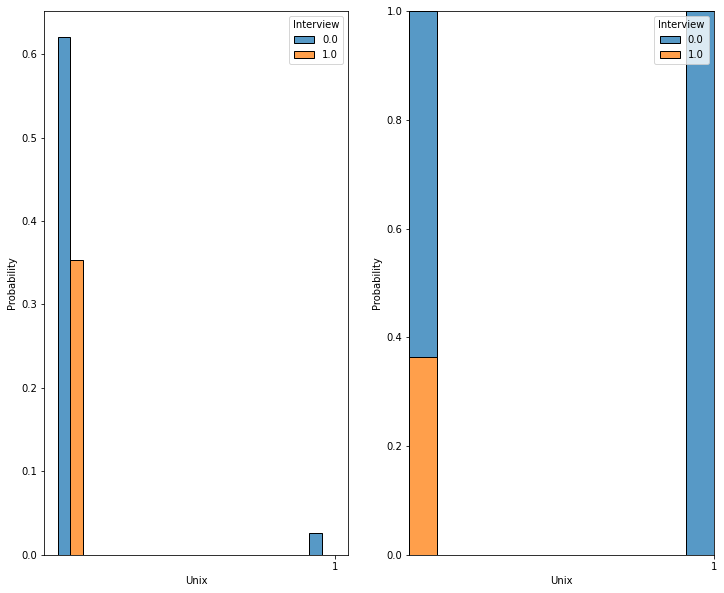

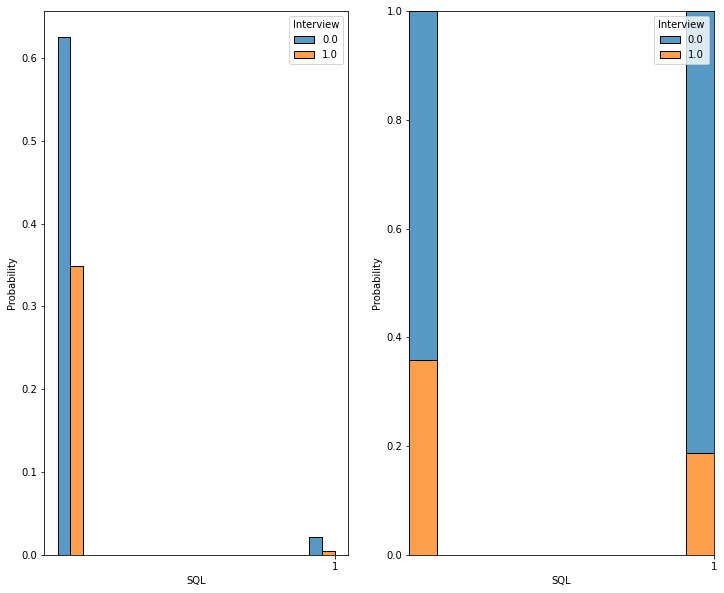

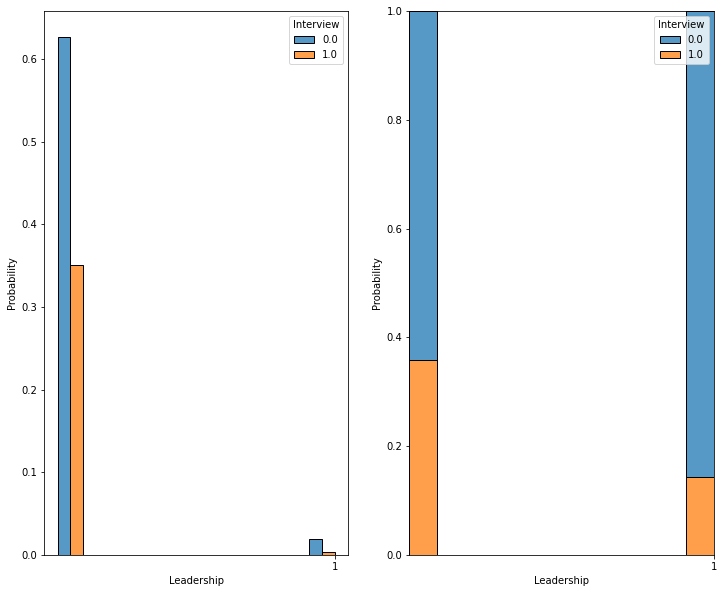

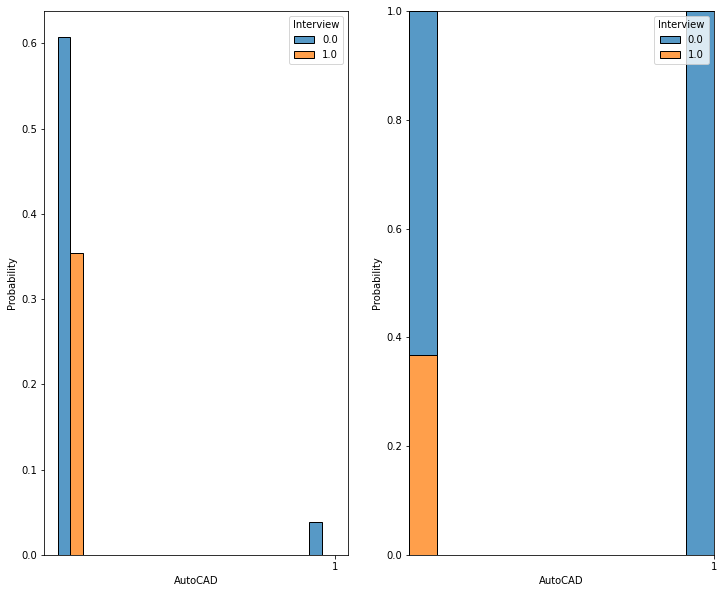

In [15]:
for col in ['Unix', 'SQL', 'Leadership', 'AutoCAD']:
  fig, ax = plt.subplots(1,2)

  ax[0].set_xticks([1, 2])
  ax[1].set_xticks([1, 2])

  ax1 = sns.histplot(data=df, x=col, hue="Interview", stat="probability", multiple="dodge", ax=ax[0])
  ax2 = sns.histplot(data=df, x=col, hue="Interview", stat="probability", multiple="fill", ax=ax[1])

  fig.show()

## Preprocessing

In [17]:
def preprocess_inputs(df):
  df = df.copy()

  # Drop the ID column
  df = df.drop(['Unnamed: 0'], axis=1)

  # Split into X and y
  y = df['Interview']
  X = df.drop(['Interview'], axis=1)

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # Scale data
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

  return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,Baseball,Basketball,Branding,Budgeting,Business Analysis,Business Intelligence,Business Planning,Business Process,Business Process Improvement,Business Services,Business Strategy,Change Management,Coaching,Communication,Company Research,Construction,Contract Negotiation,Contractual Agreements,Customer Relationship Management,Customer Satisfaction,Customer Service,Data Analysis,Databases,Decision Making,Department of Defense,Design,Development Tools,Digital Marketing,Digital Media,Diving,Drawing,Ecommerce,Editing,Electronics,Email,Employee Benefits Design,Energy,Enterprise Software,Entrepreneurship,Event Planning,Facilitation,Facility Management,Finance,Financial Analysis,Financial Reporting,Financial Risk,Food and Beverage,Football,Forecasting,Fundraising,Gas,General Ledger,Golf,Government Agencies,Grant Writing,Graphic Design,Graphics,Grocery,Gymnastics,HTML,HTML5,Healthcare,Healthcare Management,Heavy Equipment,Helping Clients Succeed,Higher Education,History,Hospitality Industry,Hospitals,Information Systems,Information Technology,Insurance,Integrated Marketing,Integration,Internal Audit,Interpersonal Skills,Interviewing,Investments,Invoicing,JQuery,Java,Javascript,Job Description Development,Job Scanning,Joint Ventures,Journalism,Journals,K12 Education,Kanban,Key Account Development,Key Performance Indicators,Kindergarten,Knowledge Base,Knowledge Management,Knowledge Sharing,Laboratory Skills,Leadership,Leadership Development,Lean Manufacturing,Legal Issues,Legal Writing,Linux,Litigation,Local Marketing,Logistics Management,Marine Corps,Mechanical Engineering,Medical Compliance,Military Aviation,Military Weapons,Negotiation,Network Administration,Network Attached Storage,Network Communications,Network Systems,New Business Opportunities,New Hires,Newsletters,Nonprofit Organizations,Nutrition,Office Administration,Online Advertising,Operating Systems,Operations Management,Oracle Database,Order Fulfillment,Organizational Development,Organizational Structure,Outsourcing,Partnerships,Performance Tuning,Presentations,Pricing Strategy,Problem Solving,Program Management,Project Planning,Public Policy,Public Relations,Public Speaking,Qualifying Prospects,Qualitative Research,Quality Auditing,Quality Improvement,Quality System,Quantitative Research,Query Writing,Queues,QuickBooks,Quotations,Range,Real Estate,Records,Recruiting,Regulations,Requirements Analysis,Research,Residential Homes,Retail,Reviews,SQL,Sales Management,Schedules,Soccer,Social Media,Software,Software Documentation,Staff Development,Strategic Planning,Strategy,Supervisory Skills,Swimming,Teaching,Team Building,Team Leadership,Team Management,Teamwork,Telecommunications,Testing,Time Management,Training,Troubleshooting,Underwriting,Unified Modeling Language,University Teaching,Unix,User Acceptance Testing,User Experience,User Interface Design,Validation,Vendor Management,Vendors,Video,Video Editing,Video Production,Visual Merchandising,Volleyball,Volunteer Management,Volunteering,Water Resource Management,Web Applications,Web Design,Web Development,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
80,-0.153755,-0.175933,-0.357217,-0.108084,-0.118539,-0.175933,-0.128187,-0.202152,-0.208263,-0.182792,-0.412638,-0.377466,-0.145693,-0.353094,-0.108084,-0.108084,-0.220059,-0.175933,-0.137199,-0.145693,-0.096561,-0.16883,-0.327745,-0.118539,-0.175933,-0.161451,-0.108084,-0.161451,-0.305670,-0.137199,-0.161451,-0.332049,-0.319032,-0.344765,2.493324,-0.182792,-0.06812,-0.332049,-0.175933,-0.393277,-0.153755,-0.161451,-0.202152,-0.175933,-0.161451,-0.182792,-0.332049,-0.145693,-0.145693,-0.108084,-0.118539,-0.195881,-0.189434,-0.161451,-0.168830,6.503845,-0.340557,-0.373462,-0.182792,-0.128187,-0.16883,-0.145693,-0.161451,2.677650,-0.161451,-0.128187,-0.161451,-0.16883,-0.153755,-0.195881,-0.1537

In [19]:
X_train.describe()

,Adobe Illustrator,Adobe Photoshop,Agile Methodologies,Analytical Skills,Art,Art Direction,Auditing,AutoCAD,Automation,Automotive,Baseball,Basketball,Branding,Budgeting,Business Analysis,Business Intelligence,Business Planning,Business Process,Business Process Improvement,Business Services,Business Strategy,Change Management,Coaching,Communication,Company Research,Construction,Contract Negotiation,Contractual Agreements,Customer Relationship Management,Customer Satisfaction,Customer Service,Data Analysis,Databases,Decision Making,Department of Defense,Design,Development Tools,Digital Marketing,Digital Media,Diving,Drawing,Ecommerce,Editing,Electronics,Email,Employee Benefits Design,Energy,Enterprise Software,Entrepreneurship,Event Planning,Facilitation,Facility Management,Finance,Financial Analysis,Financial Reporting,Financial Risk,Food and Beverage,Football,Forecasting,Fundraising,Gas,General Ledger,Golf,Government Agencies,Grant Writing,Graphic Design,Graphics,Grocery,Gymnastics,HTML,HTML5,Healthcare,Healthcare Management,Heavy Equipment,Helping Clients Succeed,Higher Education,History,Hospitality Industry,Hospitals,Information Systems,Information Technology,Insurance,Integrated Marketing,Integration,Internal Audit,Interpersonal Skills,Interviewing,Investments,Invoicing,JQuery,Java,Javascript,Job Description Development,Job Scanning,Joint Ventures,Journalism,Journals,K12 Education,Kanban,Key Account Development,Key Performance Indicators,Kindergarten,Knowledge Base,Knowledge Management,Knowledge Sharing,Laboratory Skills,Leadership,Leadership Development,Lean Manufacturing,Legal Issues,Legal Writing,Linux,Litigation,Local Marketing,Logistics Management,Marine Corps,Mechanical Engineering,Medical Compliance,Military Aviation,Military Weapons,Negotiation,Network Administration,Network Attached Storage,Network Communications,Network Systems,New Business Opportunities,New Hires,Newsletters,Nonprofit Organizations,Nutrition,Office Administration,Online Advertising,Operating Systems,Operations Management,Oracle Database,Order Fulfillment,Organizational Development,Organizational Structure,Outsourcing,Partnerships,Performance Tuning,Presentations,Pricing Strategy,Problem Solving,Program Management,Project Planning,Public Policy,Public Relations,Public Speaking,Qualifying Prospects,Qualitative Research,Quality Auditing,Quality Improvement,Quality System,Quantitative Research,Query Writing,Queues,QuickBooks,Quotations,Range,Real Estate,Records,Recruiting,Regulations,Requirements Analysis,Research,Residential Homes,Retail,Reviews,SQL,Sales Management,Schedules,Soccer,Social Media,Software,Software Documentation,Staff Development,Strategic Planning,Strategy,Supervisory Skills,Swimming,Teaching,Team Building,Team Leadership,Team Management,Teamwork,Telecommunications,Testing,Time Management,Training,Troubleshooting,Underwriting,Unified Modeling Language,University Teaching,Unix,User Acceptance Testing,User Experience,User Interface Design,Validation,Vendor Management,Vendors,Video,Video Editing,Video Production,Visual Merchandising,Volleyball,Volunteer Management,Volunteering,Water Resource Management,Web Applications,Web Design,Web Development,Windows,Windows Server,Wireless Technologies,WordPress,Workshops,Writing,Veteran,Female,URM,Disability
count,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000e+02,4.330000

In [20]:
y_train.value_counts()

0.0    276
1.0    157
Name: Interview, dtype: int64

## Model building without dimensionality reduction

In [21]:
models = {
    '      Logistic Regression': LogisticRegression(),
    ' Decision Tree Classifier': DecisionTreeClassifier(),
    ' Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

In [22]:
for name, model in models.items():
  model.fit(X_train, y_train)
  print(f'{name} trained!')

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!


In [23]:
for name, model in models.items():
  print(f'{name} | accuracy: {model.score(X_test, y_test):.4f} | log loss: {log_loss(y_test, model.predict_proba(X_test)):.4f} | f1: {f1_score(y_test, model.predict(X_test)):.4f}')

      Logistic Regression | accuracy: 0.9624 | log loss: 0.1471 | f1: 0.9440
 Decision Tree Classifier | accuracy: 0.8602 | log loss: 4.8280 | f1: 0.8000
 Random Forest Classifier | accuracy: 0.9032 | log loss: 0.3083 | f1: 0.8548
Support Vector Classifier | accuracy: 0.9731 | log loss: 0.0898 | f1: 0.9587


## Model building with dimensionality reduction

- Using all features and just switching the perspective

In [25]:
n_components = 222

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=[ f'PC {i}' for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=[ f'PC {i}' for i in range(1, n_components + 1)])

In [26]:
X_train_reduced

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21,PC 22,PC 23,PC 24,PC 25,PC 26,PC 27,PC 28,PC 29,PC 30,PC 31,PC 32,PC 33,PC 34,PC 35,PC 36,PC 37,PC 38,PC 39,PC 40,PC 41,PC 42,PC 43,PC 44,PC 45,PC 46,PC 47,PC 48,PC 49,PC 50,PC 51,PC 52,PC 53,PC 54,PC 55,PC 56,PC 57,PC 58,PC 59,PC 60,PC 61,PC 62,PC 63,PC 64,PC 65,PC 66,PC 67,PC 68,PC 69,PC 70,PC 71,PC 72,PC 73,PC 74,PC 75,PC 76,PC 77,PC 78,PC 79,PC 80,PC 81,PC 82,PC 83,PC 84,PC 85,PC 86,PC 87,PC 88,PC 89,PC 90,PC 91,PC 92,PC 93,PC 94,PC 95,PC 96,PC 97,PC 98,PC 99,PC 100,PC 101,PC 102,PC 103,PC 104,PC 105,PC 106,PC 107,PC 108,PC 109,PC 110,PC 111,PC 112,PC 113,PC 114,PC 115,PC 116,PC 117,PC 118,PC 119,PC 120,PC 121,PC 122,PC 123,PC 124,PC 125,PC 126,PC 127,PC 128,PC 129,PC 130,PC 131,PC 132,PC 133,PC 134,PC 135,PC 136,PC 137,PC 138,PC 139,PC 140,PC 141,PC 142,PC 143,PC 144,PC 145,PC 146,PC 147,PC 148,PC 149,PC 150,PC 151,PC 152,PC 153,PC 154,PC 155,PC 156,PC 157,PC 158,PC 159,PC 160,PC 161,PC 162,PC 163,PC 164,PC 165,PC 166,PC 167,PC 168,PC 169,PC 170,PC 171,PC 172,PC 173,PC 174,PC 175,PC 176,PC 177,PC 178,PC 179,PC 180,PC 181,PC 182,PC 183,PC 184,PC 185,PC 186,PC 187,PC 188,PC 189,PC 190,PC 191,PC 192,PC 193,PC 194,PC 195,PC 196,PC 197,PC 198,PC 199,PC 200,PC 201,PC 202,PC 203,PC 204,PC 205,PC 206,PC 207,PC 208,PC 209,PC 210,PC 211,PC 212,PC 213,PC 214,PC 215,PC 216,PC 217,PC 218,PC 219,PC 220,PC 221,PC 222
80,0.548413,-1.576656,0.129420,0.462898,0.073803,-1.174180,-1.357767,-0.025950,-0.414216,0.357206,0.852994,-0.897627,-0.773266,0.849404,-0.263945,0.090830,-0.481191,0.607697,-0.898363,1.040847,-0.911105,-1.487646,-0.157437,-0.186785,0.204449,0.479215,0.994742,0.764750,-0.558551,-0.449500,-0.201534,0.483991,-1.465133,-0.161793,0.131267,-0.423348,-0.493276,0.740105,0.361357,0.405732,0.850349,-0.400204,1.747579,-0.703689,0.737247,1.135966,0.676272,-1.321314,0.326426,-0.311654,-0.507142,-1.277388,-1.084585,0.922034,-0.124307,0.058277,-1.213044,-0.361997,-0.907368,0.424657,0.327142,0.313154,0.971701,-0.056075,-0.876494,-0.605787,-0.880013,-0.379925,0.204831,-0.859295,-1.210145,-2.053617,0.418015,-1.274229,1.189791,0.291190,-0.149287,0.811048,-0.745022,0.466280,-1.425811,1.842447,-0.453829,-0.802358,0.404971,1.002973,-1.431635,-0.087633,0.023918,-3.161964,0.262176,1.191019,0.493445,-0.912779,0.543323,0.201184,-0.006545,0.304686,0.038002,1.279325,0.326844,-0.013005,1.225052,-1.713319,1.692708,0.177265,-0.065992,-0.177996,0.127098,-0.485968,-0.582959,-0.880061,-0.888124,-1.155159,-0.375974,-0.021924,0.317762,1.316005,-0.383312,-0.169496,-0.250050,0.804489,0.574279,-1.269871,1.316344,-0.384097,-1.297603,-0.038601,-0.025185,-1.092243,-1.430303,1.054974,-0.546991,0.511119,0.203156,0.019613,-1.416701,-0.019690,-0.780895,0.336496,1.487552,-0.436839,-0.095027,-0.297216,-0.395411,-0.230066,-1.024648,0.117975,-0.465555,0.289605,0.153840,-0.927036,0.954352,-0.691759,-0.046799,-0.222911,0.130453,0.364240,-0.531922,-1.137393,-0.327938,0.185541,-0.593387,-0.526092,0.237702,-0.043406,-0.432153,0.237233,-0.162133,0.126281,0.200498,-0.348192,0.730373,0.163475,-0.494292,-0.400955,-0.590335,0.595200,-0.313213,-0.158324,-0.177607,0.070337,-0.879694,0.703886,-0.564136,-0.428911,-0.227603,-0.251785,-0.375097,0.521467,-0.041680,-0.391488,-0.250083,0.031852,0.755395,0.536226,0.861702,0.170954,-0.327527,0.476822,0.313251,-0.074398,-0.990810,-0.052203,0.295614,-0.281105,0.345916,0.066946,0.340363,-0.260230,0.227820,-0.298213,-0.370283,-0.188990,-0.372892,-0.027692,0.086469,0.257530,0.299268,-0.029150,-0.008097,-0.097625
60,-1.492394,-2.035774,0.689707,1.167052,-0.430912,0.384678,-0.560087,0.198279,-1.042589,-1.651009,-0.615770,0.903474,-1.385908,1.365233,0.800380,-0.078051,0.446168,0.326647,-0.550663,-0.288598,1.068167,-0.970949,-1.115377,1.133106,-0.224101,-0.361358,0.513941,-0.369758,0.147887,0.109069,-0.086478,-0.280373,1.203847,1.802107,0.319836,-0.106601,1.287071,-1.774475,0.389465,-0.793894,-0.049100,0.695383,0.206027,1.022097,0.8236

Notice how most of the variance is contained in the first few principle components.

In [27]:
pca.explained_variance_

array([4.61452583, 3.09538445, 2.99220173, 2.83759425, 2.76668746,
       2.7268384 , 2.67693949, 2.62090073, 2.56973817, 2.54886376,
       2.49242895, 2.48164864, 2.45543317, 2.3984292 , 2.36069437,
       2.3500691 , 2.33329318, 2.26490442, 2.2412726 , 2.22098993,
       2.20209896, 2.17143718, 2.16144121, 2.13186976, 2.09897577,
       2.08226092, 2.0632168 , 2.02949512, 2.0121516 , 1.98324602,
       1.96323256, 1.94220474, 1.93449113, 1.90006356, 1.88574614,
       1.86049778, 1.84101596, 1.79951767, 1.78578223, 1.77669051,
       1.76209651, 1.73316582, 1.70676626, 1.69925619, 1.68546975,
       1.66681148, 1.64091553, 1.61399758, 1.6067709 , 1.59368698,
       1.57194373, 1.55550374, 1.54490205, 1.51432608, 1.5122014 ,
       1.49198737, 1.47735277, 1.46890729, 1.44901542, 1.43116177,
       1.41572389, 1.41004642, 1.38898881, 1.37770797, 1.36248331,
       1.35452427, 1.33454477, 1.32238541, 1.29062097, 1.26181842,
       1.24934611, 1.24651878, 1.23661247, 1.22928477, 1.22177

In [28]:
pca.explained_variance_ratio_

array([2.07381474e-02, 1.39109719e-02, 1.34472582e-02, 1.27524366e-02,
       1.24337743e-02, 1.22546885e-02, 1.20304378e-02, 1.17785939e-02,
       1.15486641e-02, 1.14548524e-02, 1.12012287e-02, 1.11527809e-02,
       1.10349659e-02, 1.07787843e-02, 1.06092001e-02, 1.05614491e-02,
       1.04860564e-02, 1.01787103e-02, 1.00725065e-02, 9.98135417e-03,
       9.89645622e-03, 9.75865906e-03, 9.71373617e-03, 9.58083905e-03,
       9.43301014e-03, 9.35789192e-03, 9.27230569e-03, 9.12075705e-03,
       9.04281352e-03, 8.91290889e-03, 8.82296640e-03, 8.72846523e-03,
       8.69379946e-03, 8.53907849e-03, 8.47473455e-03, 8.36126585e-03,
       8.27371258e-03, 8.08721504e-03, 8.02548660e-03, 7.98462749e-03,
       7.91904054e-03, 7.78902311e-03, 7.67038079e-03, 7.63662976e-03,
       7.57467211e-03, 7.49081997e-03, 7.37444093e-03, 7.25346895e-03,
       7.22099148e-03, 7.16219102e-03, 7.06447465e-03, 6.99059169e-03,
       6.94294660e-03, 6.80553510e-03, 6.79598655e-03, 6.70514267e-03,
      

In [29]:
models = {
    '      Logistic Regression': LogisticRegression(),
    ' Decision Tree Classifier': DecisionTreeClassifier(),
    ' Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

for name, model in models.items():
  model.fit(X_train_reduced, y_train)
  print(f'{name} trained!')

for name, model in models.items():
  print(f'{name} | accuracy: {model.score(X_test_reduced, y_test):.4f} | log loss: {log_loss(y_test, model.predict_proba(X_test_reduced)):7.4f} | f1: {f1_score(y_test, model.predict(X_test_reduced)):.4f}')

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!
      Logistic Regression | accuracy: 0.9624 | log loss:  0.1471 | f1: 0.9440
 Decision Tree Classifier | accuracy: 0.8065 | log loss:  6.6849 | f1: 0.7600
 Random Forest Classifier | accuracy: 0.9570 | log loss:  0.3798 | f1: 0.9322
Support Vector Classifier | accuracy: 0.9731 | log loss:  0.0906 | f1: 0.9587


The idea now is to drop all columns with little variance and hold on to the first few, as they hold the most amount of information.

In [30]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=[ f'PC {i}' for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=[ f'PC {i}' for i in range(1, n_components + 1)])

models = {
    '      Logistic Regression': LogisticRegression(),
    ' Decision Tree Classifier': DecisionTreeClassifier(),
    ' Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

for name, model in models.items():
  model.fit(X_train_reduced, y_train)
  print(f'{name} trained!')

for name, model in models.items():
  print(f'{name} | accuracy: {model.score(X_test_reduced, y_test):.4f} | log loss: {log_loss(y_test, model.predict_proba(X_test_reduced)):7.4f} | f1: {f1_score(y_test, model.predict(X_test_reduced)):.4f}')

      Logistic Regression trained!
 Decision Tree Classifier trained!
 Random Forest Classifier trained!
Support Vector Classifier trained!
      Logistic Regression | accuracy: 0.9570 | log loss:  0.1243 | f1: 0.9355
 Decision Tree Classifier | accuracy: 0.9570 | log loss:  1.4855 | f1: 0.9355
 Random Forest Classifier | accuracy: 0.9624 | log loss:  0.2882 | f1: 0.9440
Support Vector Classifier | accuracy: 0.9570 | log loss:  0.1209 | f1: 0.9344


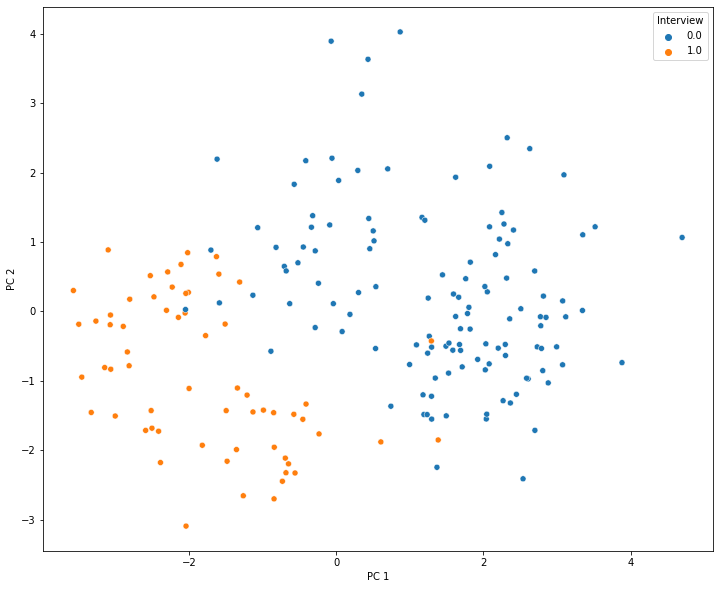

In [31]:
ax = sns.scatterplot(x=X_test_reduced['PC 1'], y=X_test_reduced['PC 2'], hue=y_test)
plt.show()

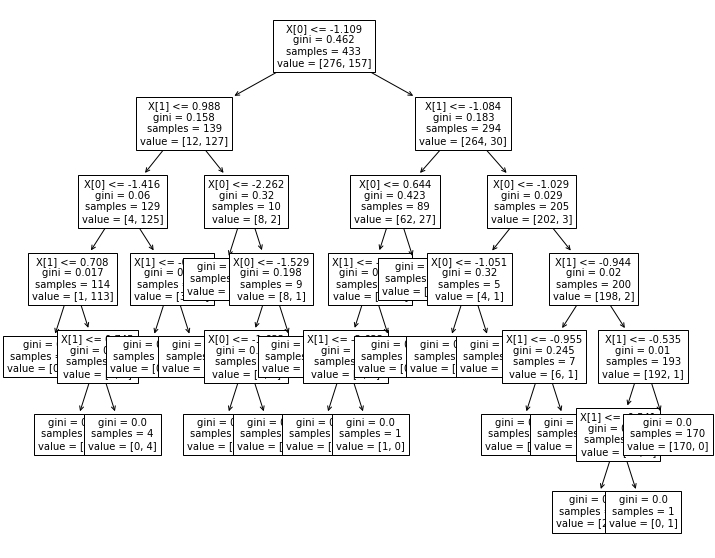

In [32]:
plot_tree(models.get(' Decision Tree Classifier'), fontsize=10)
plt.show()

# For Home

Try out clustering and PCA on [this dataset](https://www.kaggle.com/datasets/uciml/aps-failure-at-scania-trucks-data-set).